# `n_gaussians` experiment

In [11]:
%matplotlib inline

import pickle
import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 15})

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-3rd_mnras_submission/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
# `/data/images/Orion.cont.image.fits`

/home/martin/miniconda3/lib/python3.7/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


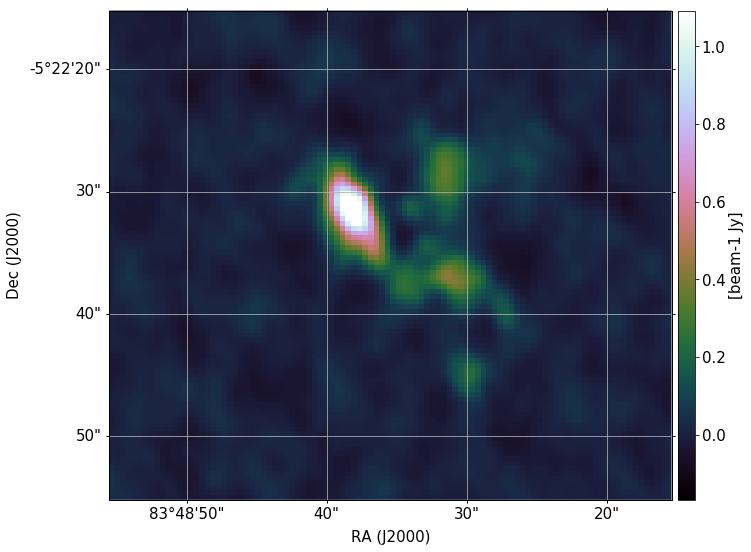

In [12]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

#data,wcs,hdu,spec = load_data(fits_path)

loaded_fits = load_data(fits_path)
data = loaded_fits["data"]
hdu = loaded_fits["hdu"]
wcs = loaded_fits["wcs"]
spec = loaded_fits["spec"]
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [13]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 20.026702269692922%
[INFO] Number of ICEs: 3
Isolated Cloud Entity A: 47 pixels of significant emission.
Isolated Cloud Entity B: 508 pixels of significant emission.
Isolated Cloud Entity C: 194 pixels of significant emission.


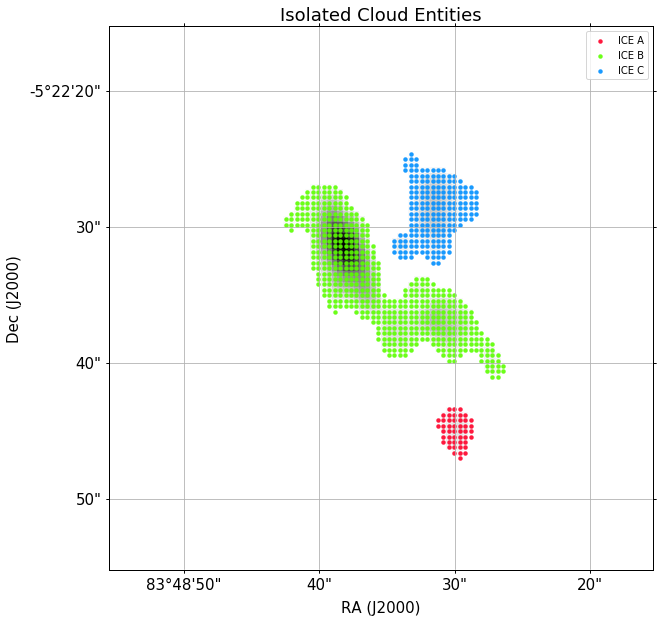

####################################################################################################


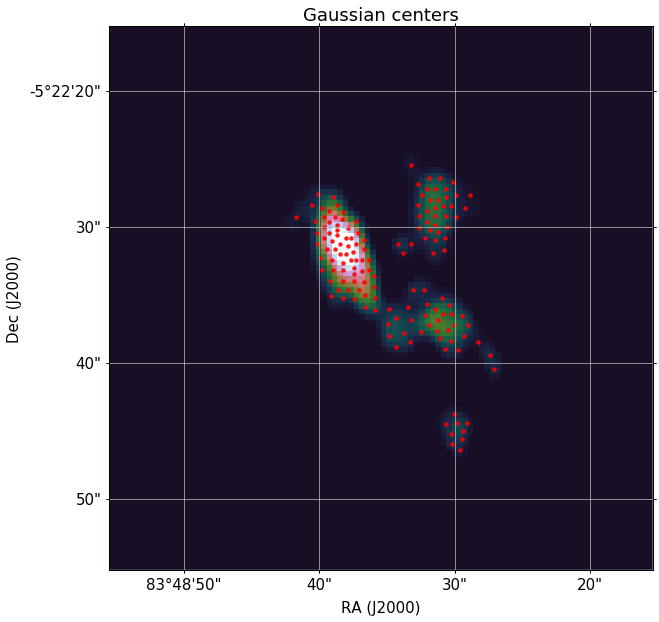

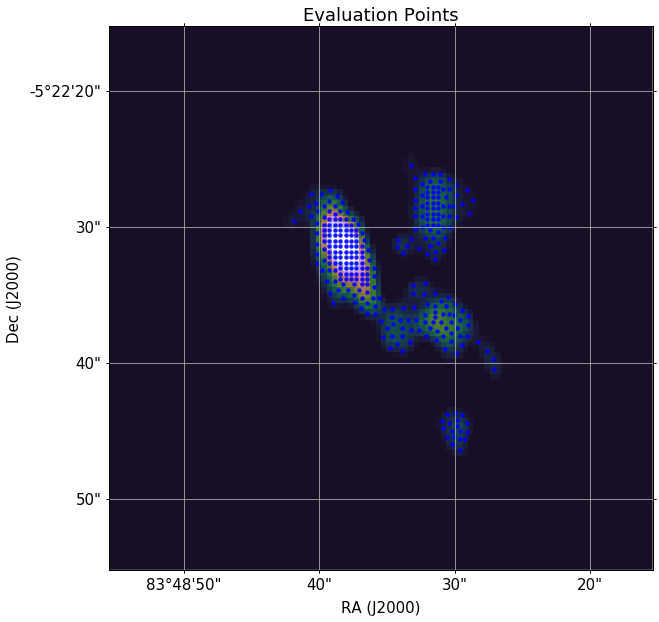

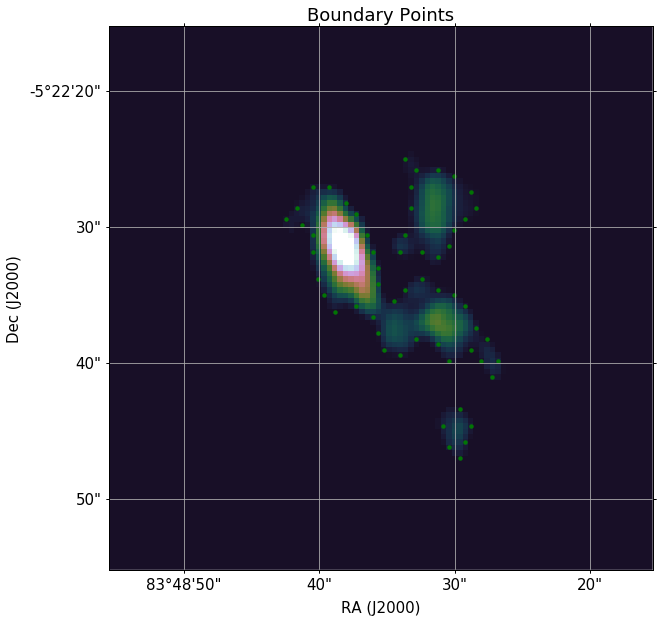

In [16]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_gaussians=150, kappa=1)

In [28]:
results_orionKL = list()
n_gaussians_list = np.arange(50, 501, 25)

for n_gaussians in n_gaussians_list:
    hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=False, n_gaussians=n_gaussians, eps=100., kappa=1)
    hdmc.build_gmr()
    # obtaining stats
    (rmsR, infR, _, nfa, nfl) = hdmc.get_residual_stats(verbose=False)
    et = hdmc.elapsed_time
    results_orionKL.append({"rmsR":rmsR, "infR":infR, "nfa":nfa, "nfl":nfl, "et":et})

[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 6.675567423230974%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.021041933611733947
Inf norm of residual: 0.07215012390881902
Variance of residual: 0.0004152190208985708
Normalized flux addition: 0.07106727668385254
Normalized flux lost: 0.035930728153407844


[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 10.013351134846461%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01797628029607146
Inf norm of residual: 0.0734491157241633
Variance of residual: 0.0002999421

TypeError: Improper input: N=850 must not exceed M=806

In [29]:
with open('exp-n_gaussians-orionKL.pickle', 'wb') as handle:
    pickle.dump(results_orionKL, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

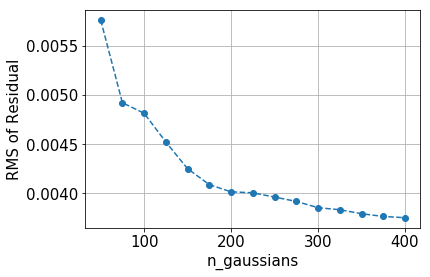

In [43]:
rmsR_list = []
for res in results_orionKL:
    rmsR_list.append(res["rmsR"])

plt.plot(n_gaussians_list[0:15], rmsR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("RMS of Residual")
plt.grid()
#plt.legend(loc="best")
plt.show()

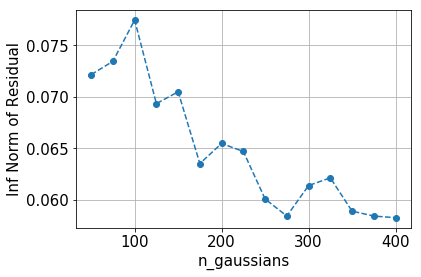

In [44]:
infR_list = []
for res in results_orionKL:
    infR_list.append(res["infR"])

plt.plot(n_gaussians_list[0:15], infR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Inf Norm of Residual")
plt.grid()
plt.show()

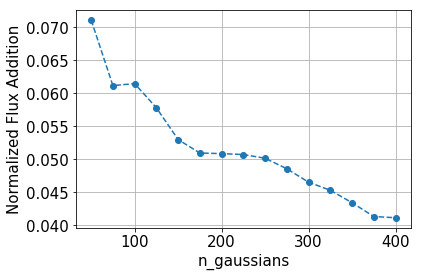

In [46]:
nfa_list = []
for res in results_orionKL:
    nfa_list.append(res["nfa"])

plt.plot(n_gaussians_list[0:15], nfa_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Addition")
plt.grid()
plt.show()

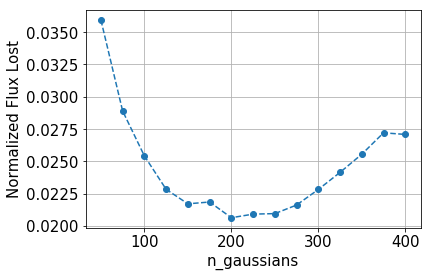

In [47]:
nfl_list = []
for res in results_orionKL:
    nfl_list.append(res["nfl"])

plt.plot(n_gaussians_list[0:15], nfl_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Lost")
plt.grid()
plt.show()

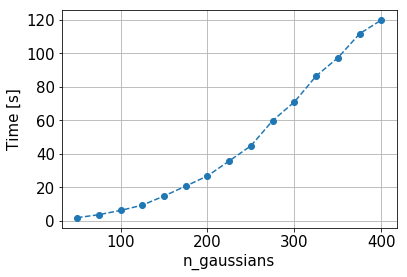

In [48]:
et_list = []
for res in results_orionKL:
    et_list.append(res["et"])

plt.plot(n_gaussians_list[0:15], et_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Time [s]")
plt.grid()
plt.show()

***
***

# `/data/SCIMES/orion_12CO_mom0.fits`

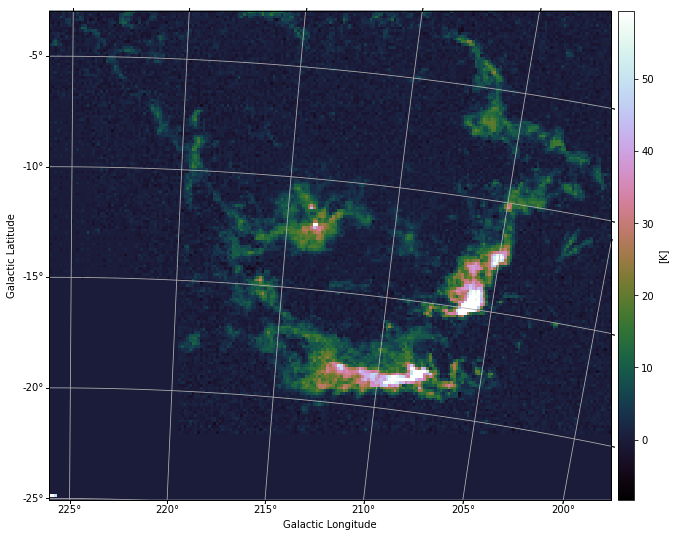

In [5]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [10]:
res_rms_list = []
res_inf_list = []
time_list = []
hdmc_list = []
kappa_values = np.arange(0.1, 5.1, 0.1)

for kappa in kappa_values:
    hdmc = HDMClouds(data, back_level=1.5, wcs=wcs, verbose=False, n_gaussians=250, eps=100., kappa=kappa)
    hdmc.build_gmr()
    res_rms,res_inf,_,_,_ = hdmc.get_residual_stats(verbose=False)
    res_rms_list.append(res_rms)
    res_inf_list.append(res_inf)
    time_list.append(hdmc.elapsed_time)
    hdmc_list.append(hdmc)

[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 4.157658406785298%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 6013 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.11803492747338469
Inf norm of residual: 0.7493125442779611
Variance of residual: 0.012343527604857614
Normalized flux addition: 0.28177389405198566
Normalized flux lost: 0.8420721778755201


[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 4.157658406785298%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 6013 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.05730290280647526
Inf norm of residual: 0.43894087013974736
Variance of residual: 0.00257087944

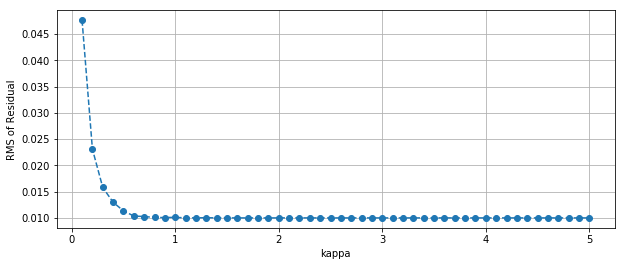

In [13]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, res_rms_list, "o--")
plt.xlabel("kappa")
plt.ylabel("RMS of Residual")
plt.grid()

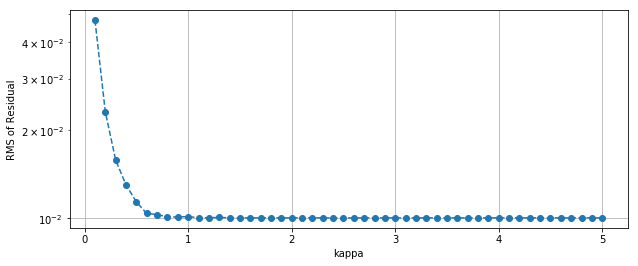

In [14]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, res_rms_list, "o--")
plt.xlabel("kappa")
plt.ylabel("RMS of Residual")
plt.grid()

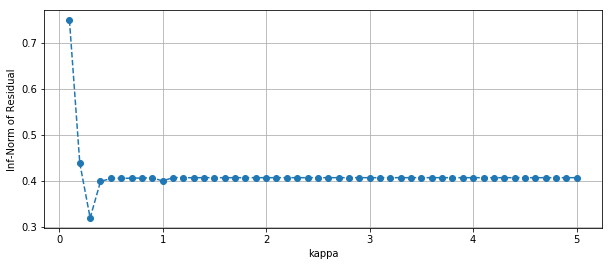

In [15]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, res_inf_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Inf-Norm of Residual")
plt.grid()

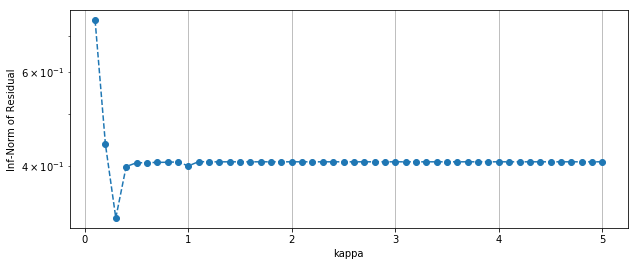

In [16]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, res_inf_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Inf-Norm of Residual")
plt.grid()

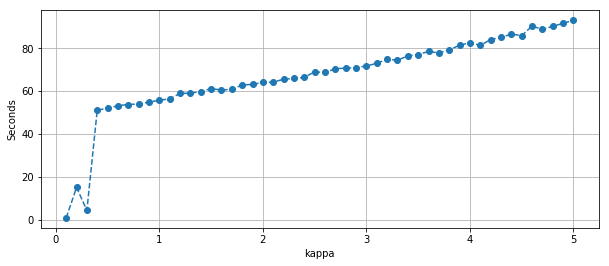

In [17]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, time_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Seconds")
plt.grid()

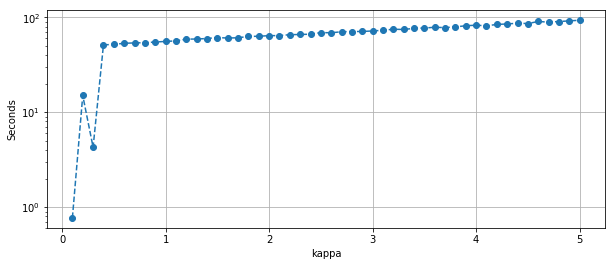

In [18]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, time_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Seconds")
plt.grid()

todo: 

1. try with different values of n_center
2. run with cube

***